# **HEART DISEASE ANALYSIS**

In this project, we will analyze [Cardiovascular Disease dataset] [CVD] (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) to find which variables are related to the disease. Then we will use different machine learning models to predict whether the patient has  cardiovascular disease or not. <br>The dataset contains information about patients doing cardiovascular disease examination.<br><br>
**Data features:**
   - Age | Objective Feature | age | int (years)<br>
   - Height | Objective Feature | height | int (cm) |<br>
   - Weight | Objective Feature | weight | float (kg) |<br>
   - BMI | Objective Feature | bmi | int |<br>
   - Gender | Objective Feature | gender | categorical code |<br>
   - Systolic blood pressure | Examination Feature | ap_hi | int |<br>
   - Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
   - Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
   - Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
   - Smoking | Subjective Feature | smoke | binary |<br>
   - Alcohol | Subjective Feature | alco | binary |<br>
   - Physical Activity | Subjective Feature | active | binary |<br>
   - Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>


In [ ]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('/content/cardio_train.csv',sep=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Data Modification

In [ ]:
data['weight'] = data['weight'].astype(int)

In [ ]:
data['BMI'] = data['weight']/((data['height']/100)**2)
data['BMI'] = data['BMI'].astype(int)

data['Age'] = data['age']/365
data['Age'] = data['Age'].astype(int)

In [ ]:
#Body Mass Index = BMI
#Systolic blood pressure = ap_hi
#Diastolic blood pressure = ap_lo
data['Systolic Blood Pressure'] = data['ap_hi'].astype(int)
data['Diastolic Blood Pressure'] = data['ap_lo'].astype(int)

In [ ]:
data.drop(['id', 'age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco','active','height','weight', 'ap_hi','ap_lo' ], axis=1, inplace=True)
data

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
0,0,21,50,110,80
1,1,34,55,140,90
2,1,23,51,130,70
3,1,28,48,150,100
4,0,23,47,100,60
...,...,...,...,...,...
69995,0,26,52,120,80
69996,1,50,61,140,90
69997,1,31,52,180,90
69998,1,27,61,135,80


In [ ]:
data.describe()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,70000.00,70000.00,70000.00,70000.00,70000.00
mean,0.50,27.06,52.84,128.82,96.63
std,0.50,6.10,6.77,154.01,188.47
min,0.00,3.00,29.00,-150.00,-70.00
25%,0.00,23.00,48.00,120.00,80.00
50%,0.00,26.00,53.00,120.00,80.00
75%,1.00,30.00,58.00,140.00,90.00
max,1.00,298.00,64.00,16020.00,11000.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cardio                    70000 non-null  int64
 1   BMI                       70000 non-null  int64
 2   Age                       70000 non-null  int64
 3   Systolic Blood Pressure   70000 non-null  int64
 4   Diastolic Blood Pressure  70000 non-null  int64
dtypes: int64(5)
memory usage: 2.7 MB


In [ ]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

### **Missing Value Detection**

In [ ]:
print("{} rows are same".format(data.duplicated().sum()))

48442 rows are same


In [ ]:
data.drop_duplicates(inplace= True)
print("{} rows are same".format(data.duplicated().sum()))

0 rows are same


Text(0.5, 1.0, 'Visualization of outliers')

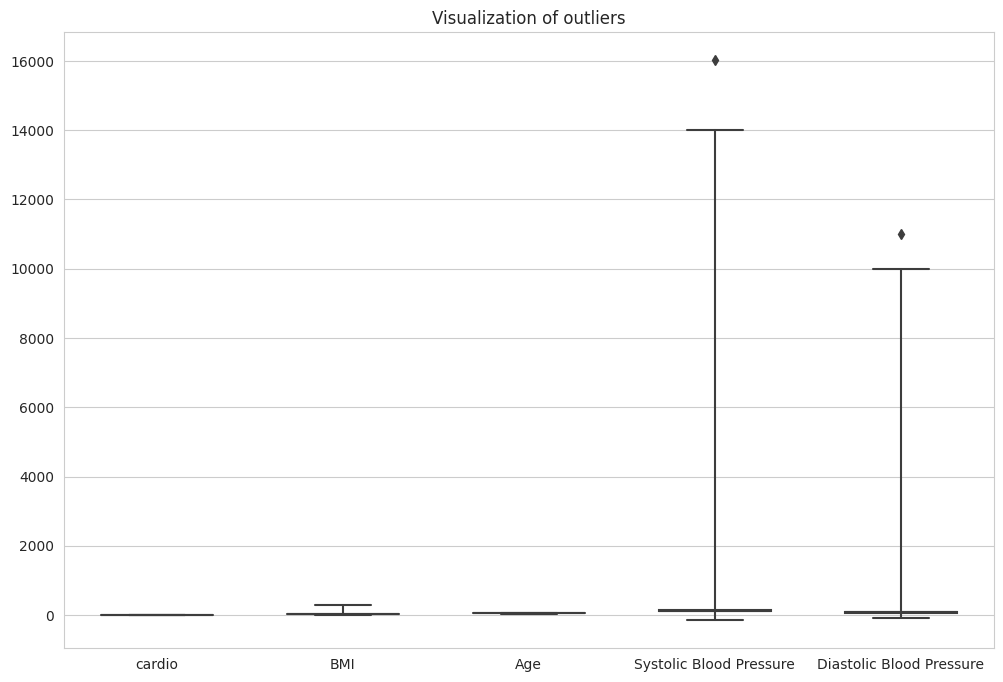

In [ ]:
# BoxPlot after removing the outliers.
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = data, width = .6, whis=500, ax = ax, fliersize = 5)
plt.title("Visualization of outliers")

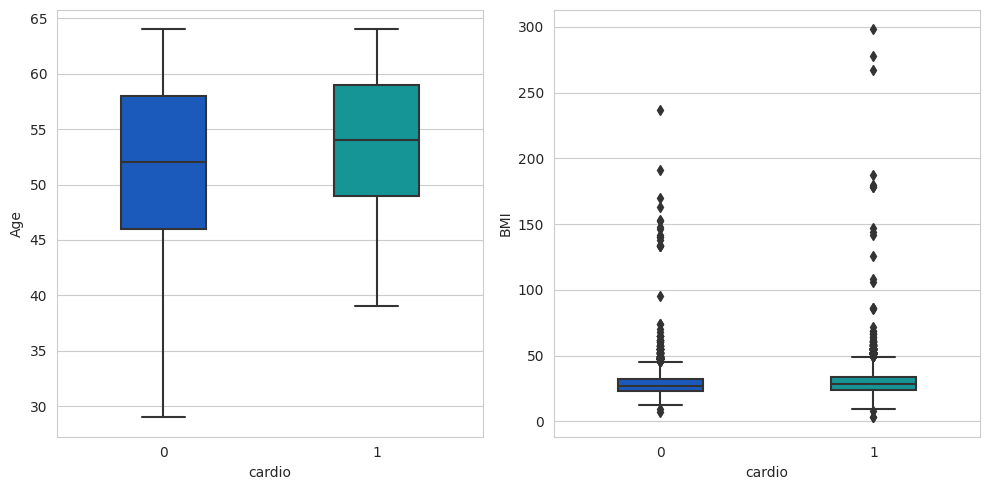

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=data['Age'],x=data['cardio'],ax=ax[0], width = .4, palette='winter')
sns.boxplot(y=data['BMI'],x=data['cardio'],ax=ax[1], width = .4, palette='winter')
plt.tight_layout()

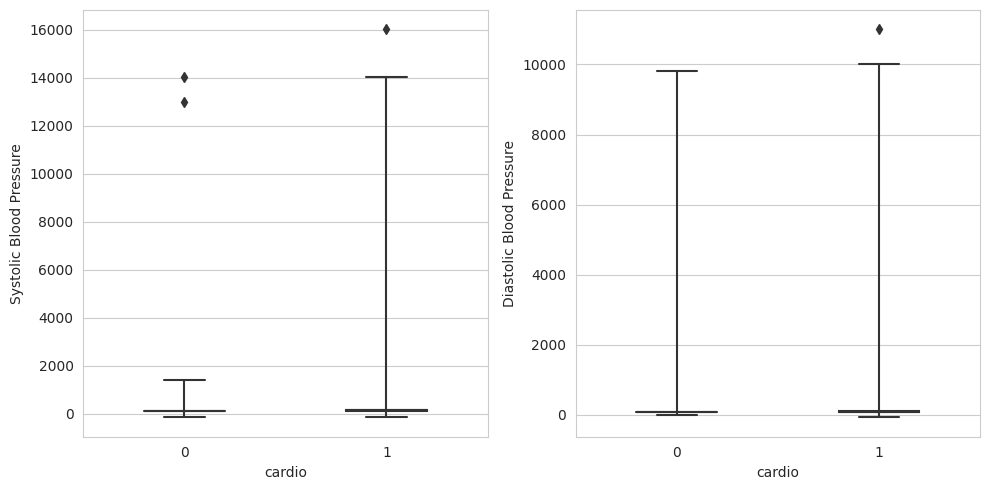

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(y=data['Systolic Blood Pressure'],x=data['cardio'],ax=ax[0],whis=500, width = .4, palette='winter')
sns.boxplot(y=data['Diastolic Blood Pressure'],x=data['cardio'],ax=ax[1],whis=500, width = .4, palette='winter')
plt.tight_layout()

In [ ]:
df_c0 = data[data['cardio'] == 0]
lista = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI','Age']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c0[e].quantile(0.25)
    Q3 = df_c0[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Age
Q minimo,80.00,40.00,9.50,28.00
Q maximo,160.00,120.00,45.50,76.00


In [ ]:
outlier_c0 = df_c0[(df_c0['Diastolic Blood Pressure']>90)|(df_c0['Diastolic Blood Pressure']<60)|(df_c0['Systolic Blood Pressure']>130)|(df_c0['Systolic Blood Pressure']<100)|(df_c0['Age']>64)|(df_c0['Age']<39)| (df_c0['BMI']>24.9)|(df_c0['BMI']<18.5)].index
df_c0.drop(outlier_c0, inplace=True)

<ipython-input-173-be7aa623197a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c0.drop(outlier_c0, inplace=True)


In [ ]:
df_c0.describe()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,2059.00,2059.00,2059.00,2059.00,2059.00
mean,0.00,21.89,51.02,115.20,75.02
std,0.00,1.62,7.21,10.02,9.37
min,0.00,19.00,39.00,100.00,60.00
25%,0.00,21.00,45.00,110.00,70.00
50%,0.00,22.00,51.00,120.00,78.00
75%,0.00,23.00,57.00,120.00,80.00
max,0.00,24.00,64.00,130.00,90.00


In [ ]:
df_c1 = data[data['cardio'] == 1]

In [ ]:
lista = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI','Age']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c1[e].quantile(0.25)
    Q3 = df_c1[e].quantile(0.75)
    IQR = Q3 - Q1

    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)

    df_quartil[e]= [minimo, maximo]

df_quartil

,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Age
Q minimo,75.00,50.00,9.00,34.00
Q maximo,195.00,130.00,49.00,74.00


In [ ]:
outlier_c1 = df_c1[(df_c1['Diastolic Blood Pressure']>105)|(df_c1['Diastolic Blood Pressure']<70)|(df_c1['Systolic Blood Pressure']>170)|(df_c1['Systolic Blood Pressure']<90)|(df_c0['Age']>64)|(df_c0['Age']<39)|(df_c1['BMI']>40)|(df_c1['BMI']<16)].index
df_c1.drop(outlier_c1, inplace=True)
df_c1.describe()

<ipython-input-177-25bf84dc6900>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outlier_c1 = df_c1[(df_c1['Diastolic Blood Pressure']>105)|(df_c1['Diastolic Blood Pressure']<70)|(df_c1['Systolic Blood Pressure']>170)|(df_c1['Systolic Blood Pressure']<90)|(df_c0['Age']>64)|(df_c0['Age']<39)|(df_c1['BMI']>40)|(df_c1['BMI']<16)].index
<ipython-input-177-25bf84dc6900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1.drop(outlier_c1, inplace=True)


,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,8854.00,8854.00,8854.00,8854.00,8854.00
mean,1.00,28.41,53.29,136.24,85.10
std,0.00,5.56,6.97,17.69,9.64
min,1.00,16.00,39.00,90.00,70.00
25%,1.00,24.00,48.00,120.00,80.00
50%,1.00,28.00,54.00,140.00,85.00
75%,1.00,33.00,59.00,150.00,90.00
max,1.00,40.00,64.00,170.00,105.00


<Axes: xlabel='colunas', ylabel='valores'>

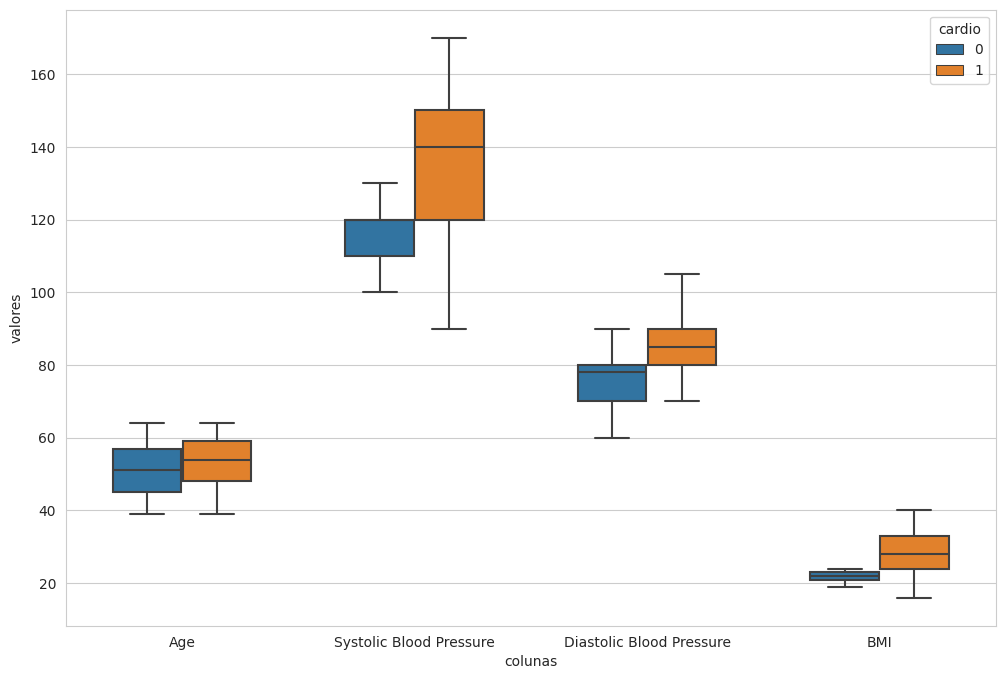

In [ ]:
data = pd.concat([df_c0, df_c1])
df = pd.melt(data,id_vars='cardio', value_vars=['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI'], var_name='colunas', value_name='valores', col_level=None)
plt.figure(figsize=(12,8))
sns.boxplot(x='colunas', y='valores',whis=1.5, width = .6, hue='cardio', data=df)

<Axes: xlabel='colunas', ylabel='valores'>

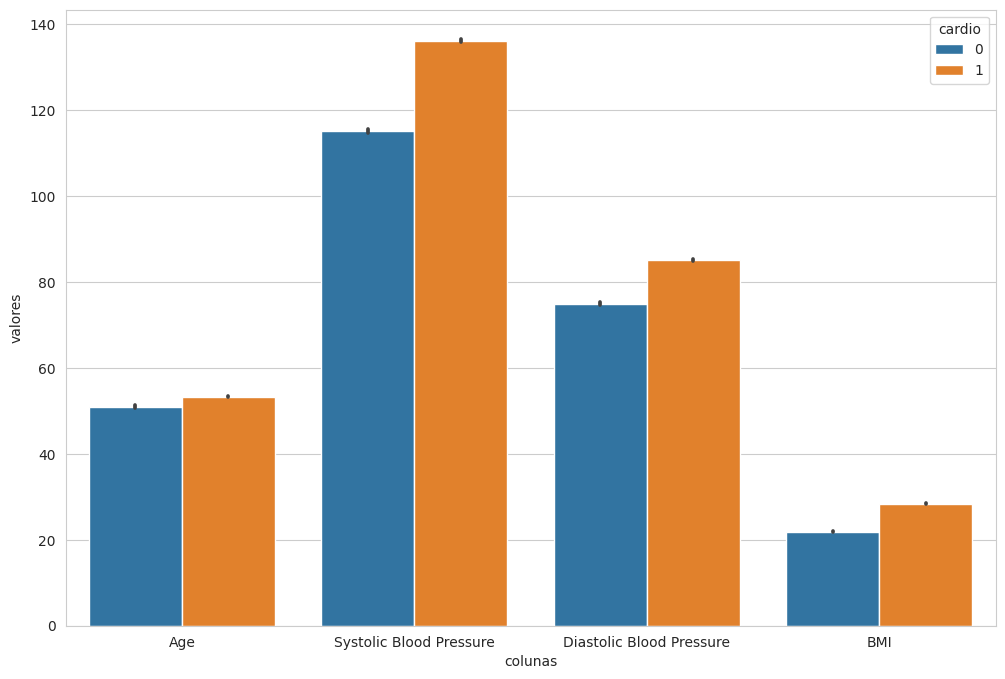

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='colunas', y='valores', hue='cardio',data=df)

### **Missing Value Detection**

In [ ]:
data.isnull().sum()

cardio                      0
BMI                         0
Age                         0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
dtype: int64

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
count,10913.00,10913.00,10913.00,10913.00,10913.00
mean,0.81,27.18,52.86,132.27,83.19
std,0.39,5.67,7.08,18.46,10.37
min,0.00,16.00,39.00,90.00,60.00
25%,1.00,23.00,47.00,120.00,79.00
50%,1.00,26.00,53.00,130.00,80.00
75%,1.00,31.00,59.00,150.00,90.00
max,1.00,40.00,64.00,170.00,105.00


# Visualization

In [ ]:
data.cardio.value_counts()

1    8854
0    2059
Name: cardio, dtype: int64

0 = No Cardio 1 = Cardio


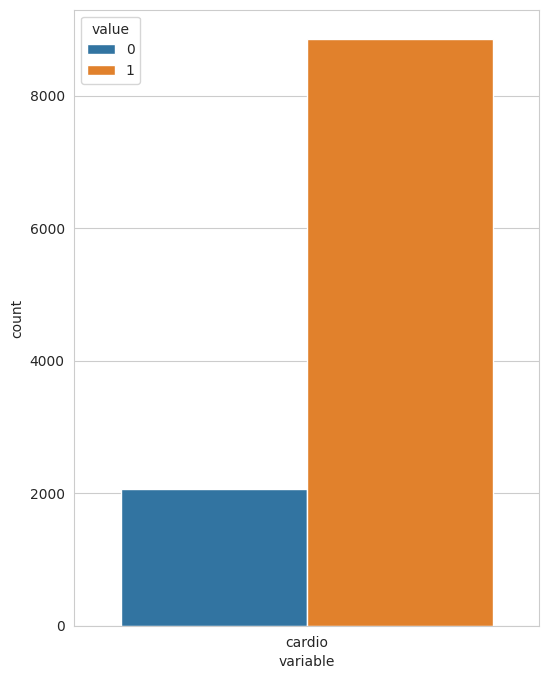

In [ ]:
plt.figure(figsize=(6,8))
dataframe_categorical = data.loc[:,['cardio']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

print ("0 = No Cardio", "1 = Cardio" )

0 = No Cardio 1 = Cardio


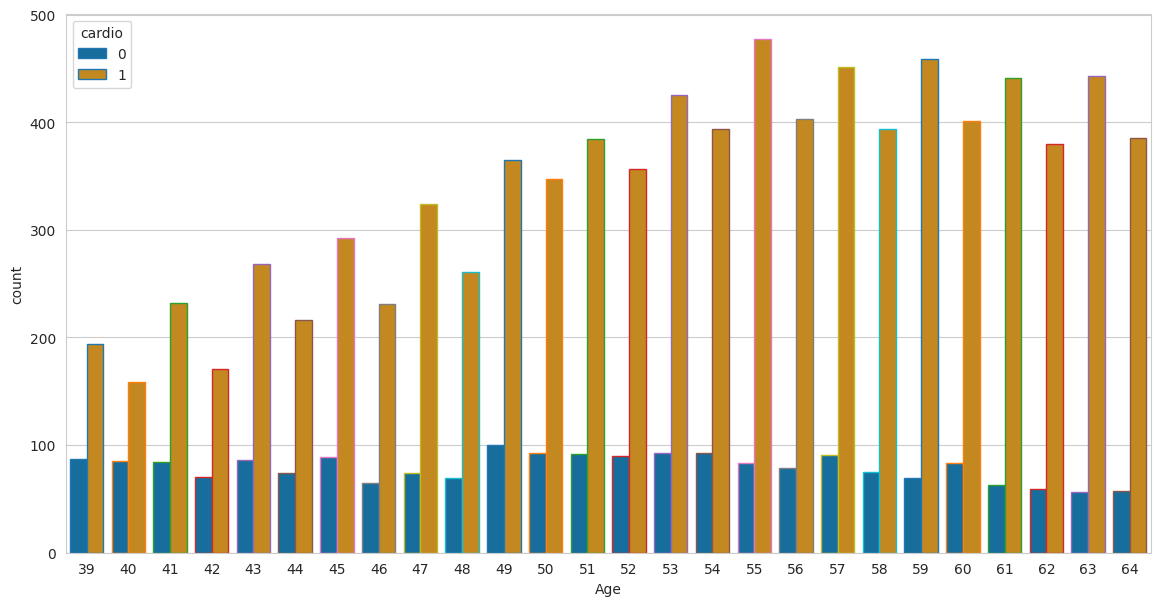

In [ ]:
plt.figure(figsize = (14,7))
sns.countplot(x='Age', hue = 'cardio', data = data, palette = 'colorblind', edgecolor = sns.color_palette(as_cmap='RdGy_r', n_colors=5));
print ("0 = No Cardio", "1 = Cardio" )

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
continous_val

['BMI', 'Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

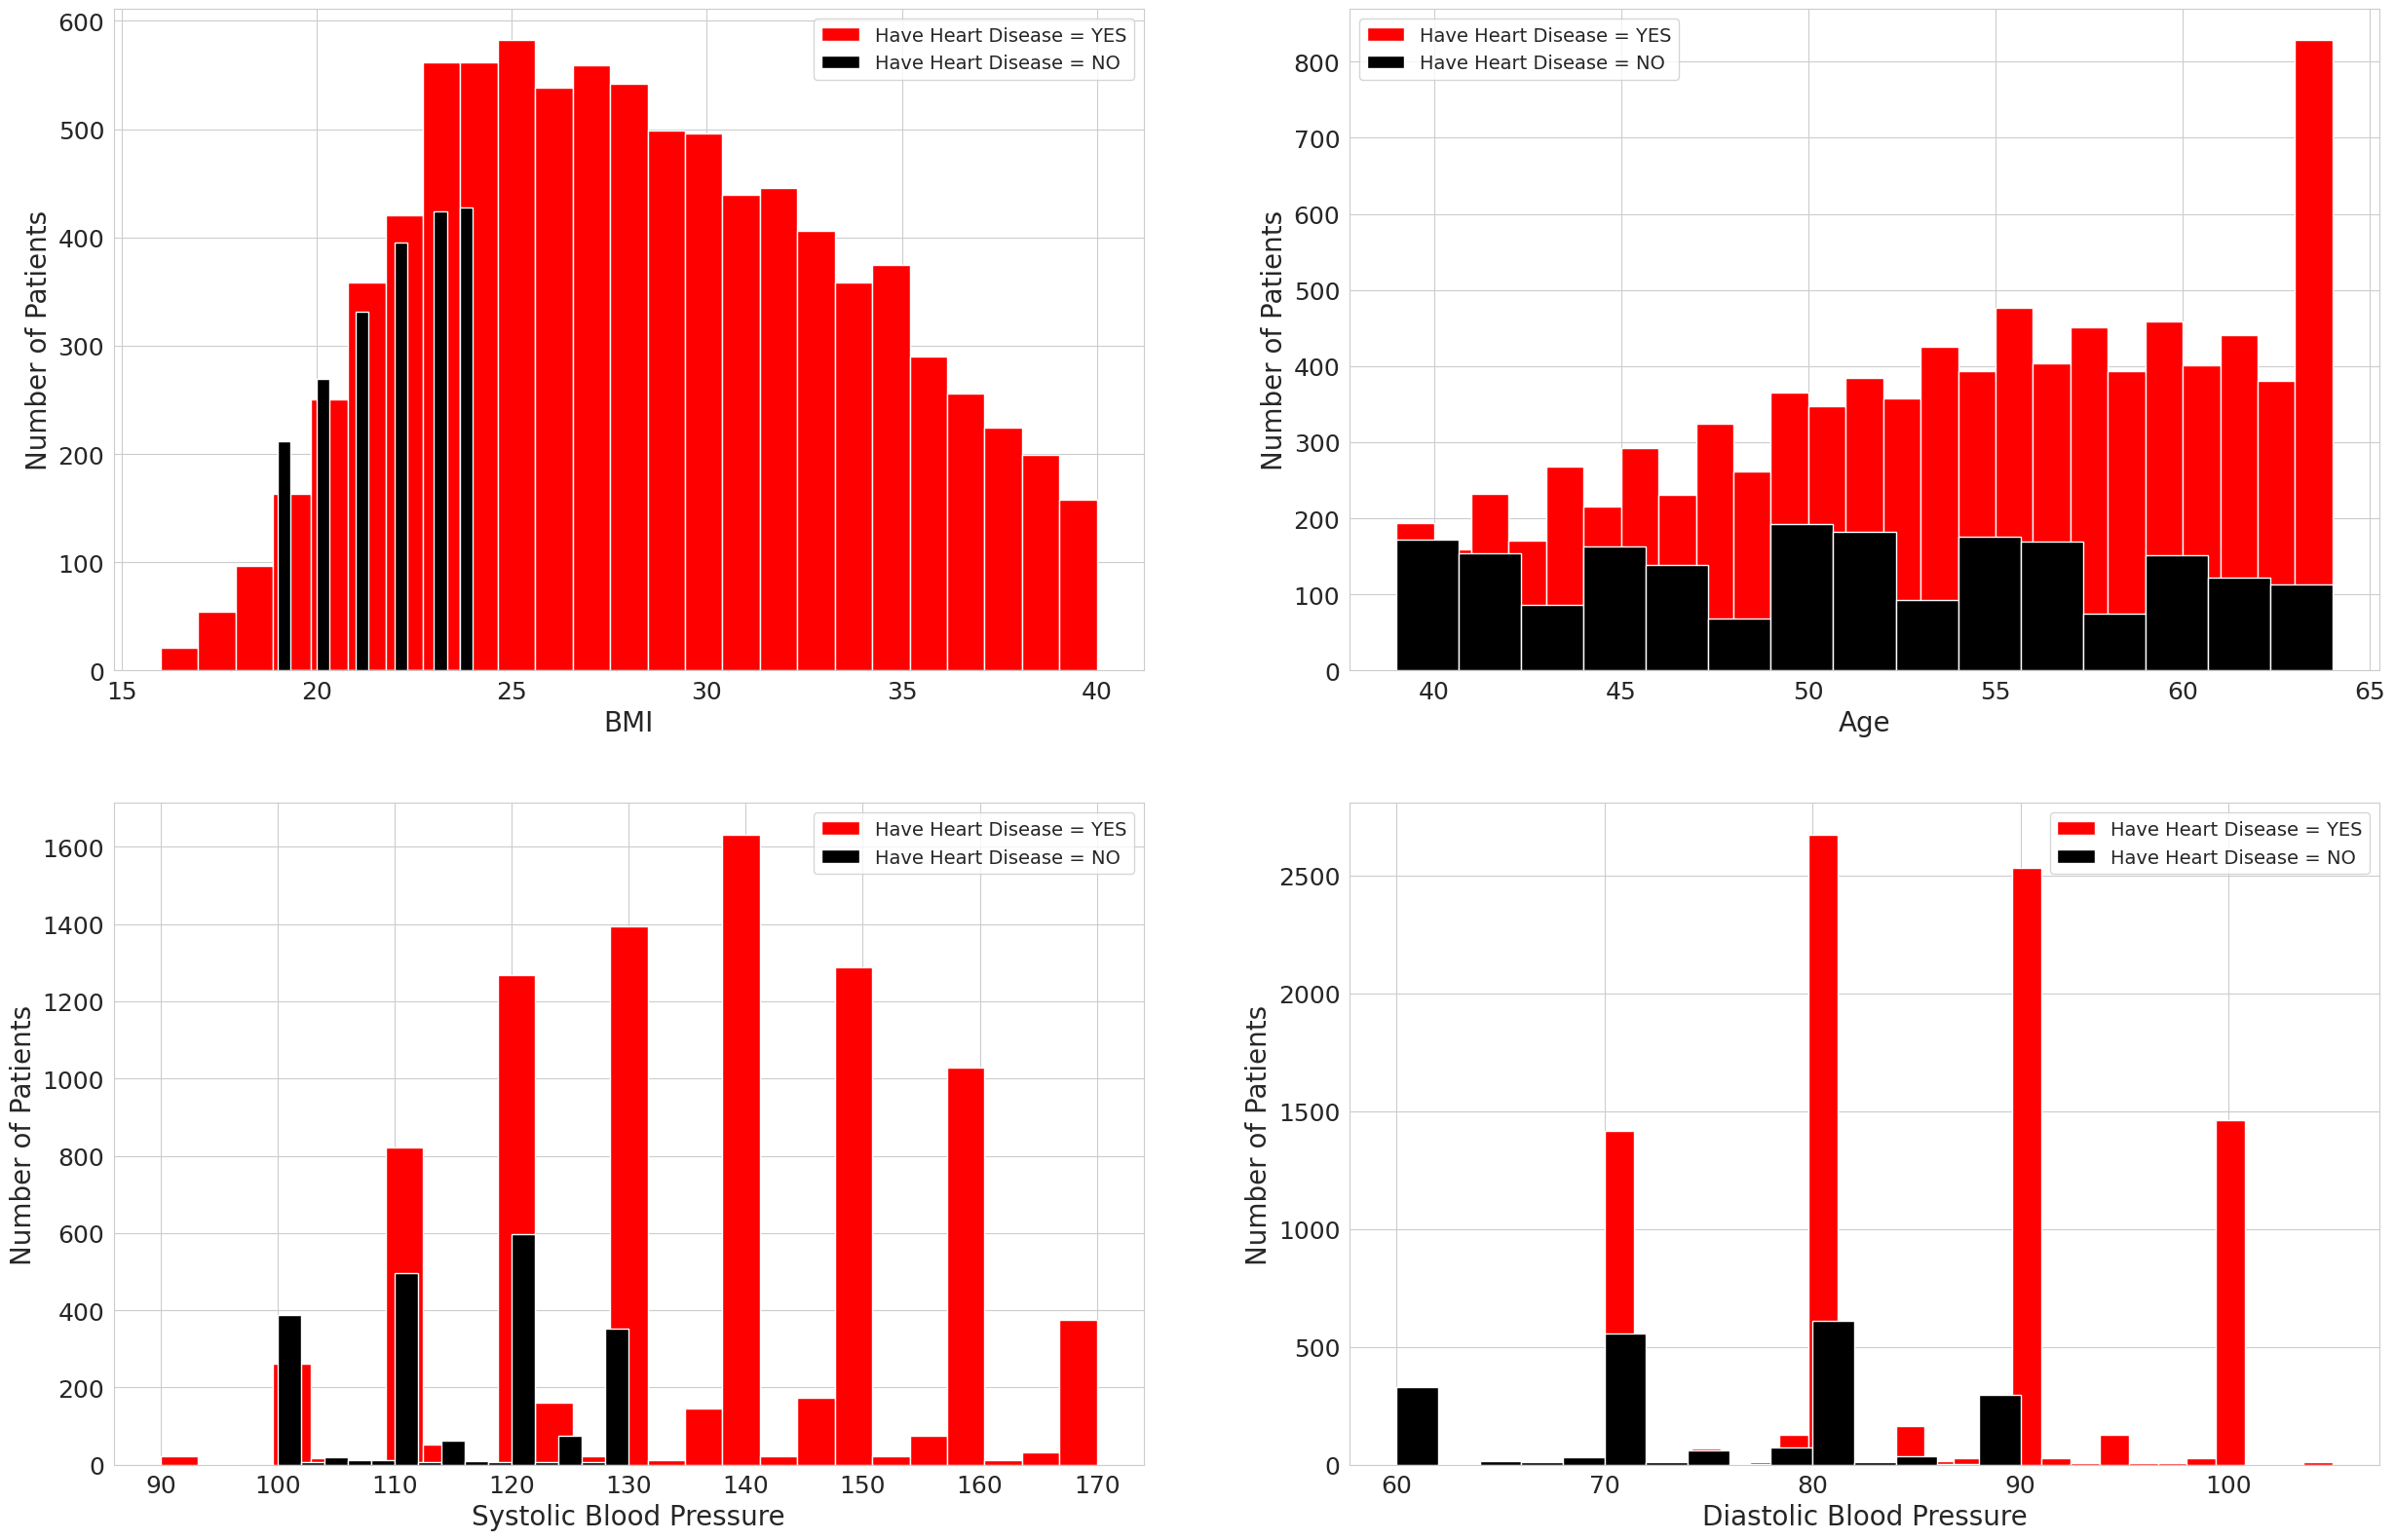

In [ ]:
plt.figure(figsize=(30, 30))

for i, column in enumerate(continous_val,1):
    plt.subplot(3, 2, i)
    data[data["cardio"] == 1][column].hist(bins=25, color='Red', label='Have Heart Disease = YES', alpha=1)
    data[data["cardio"] == 0][column].hist(bins=15, color='Black', label='Have Heart Disease = NO', alpha=1)
    plt.legend(fontsize=14)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel(column,fontsize=20)
    plt.ylabel("Number of Patients" ,fontsize=20)

In [ ]:
data.corr()

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
cardio,1.00,0.45,0.13,0.45,0.38
BMI,0.45,1.00,0.08,0.29,0.26
Age,0.13,0.08,1.00,0.11,0.05
Systolic Blood Pressure,0.45,0.29,0.11,1.00,0.60
Diastolic Blood Pressure,0.38,0.26,0.05,0.60,1.00


<ipython-input-189-3cdc0ea9df81>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correl, dtype = np.bool)


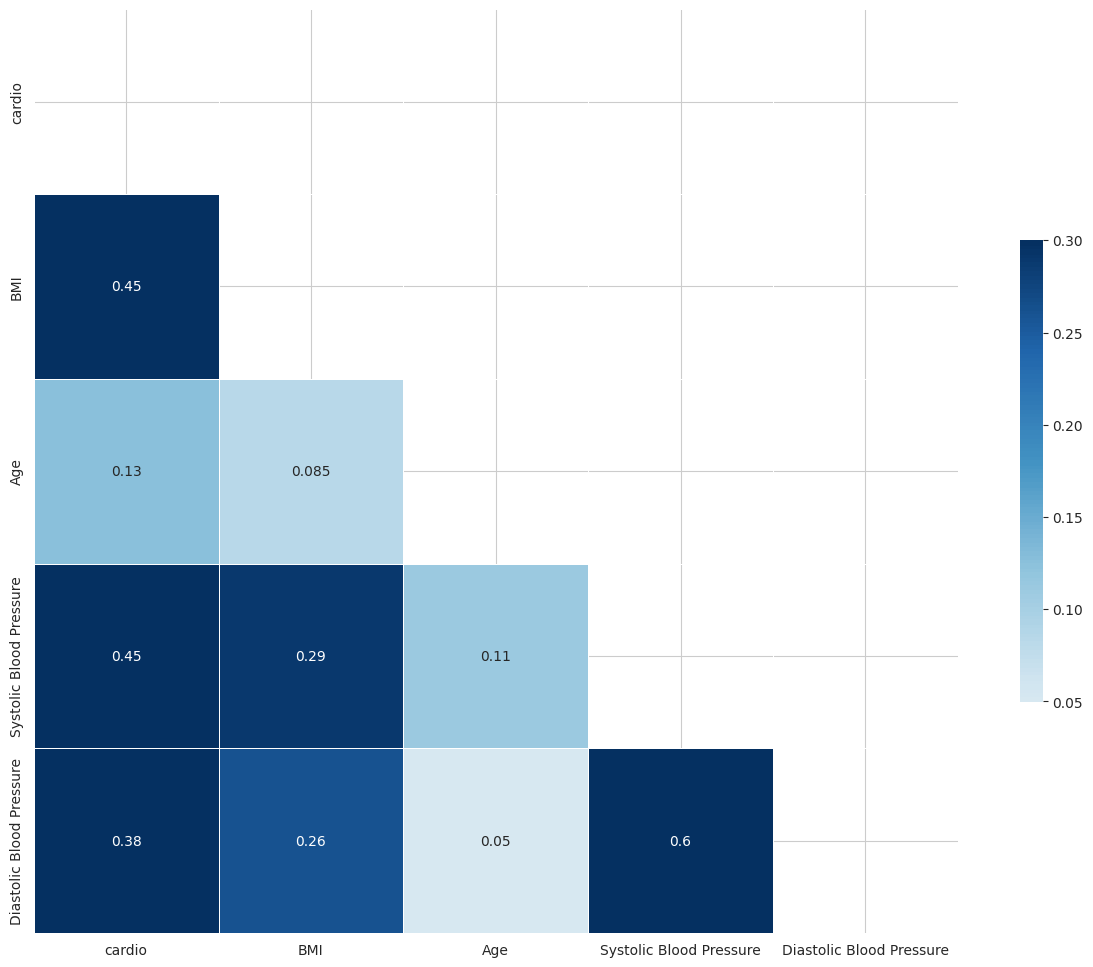

In [ ]:
# Multivariate Analysis & Correlation Detection
import seaborn as sb
correl = data.corr()
cmap = sb.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (16, 12))

sb.heatmap(correl, mask = mask, cmap ='RdBu', vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [ ]:
categorical_val.remove('cardio')
dataset = pd.get_dummies(data, columns = categorical_val)

In [ ]:
dataset

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
0,0,21,50,110,80
4,0,23,47,100,60
11,0,20,51,120,80
12,0,22,40,120,80
17,0,20,45,110,70
...,...,...,...,...,...
69933,1,26,55,110,80
69934,1,34,43,120,90
69947,1,38,63,110,80
69949,1,24,60,167,85


## **Probability and Statistics**

In [ ]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=140 or y<=90:
        return "high 2"
    else:
        return None

data.insert(1,"bp_cat", data.apply(lambda row: BPCategorize(row['Systolic Blood Pressure'], row['Diastolic Blood Pressure']), axis=1))
data['bp_cat'].value_counts()


high 1      4125
normal      3442
high 2      2016
elevated     203
Name: bp_cat, dtype: int64

In [ ]:
print(data.columns)
print(dataset.columns)

Index(['cardio', 'bp_cat', 'BMI', 'Age', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure'],
      dtype='object')
Index(['cardio', 'BMI', 'Age', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure'],
      dtype='object')


# Data Transform into StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Systolic Blood Pressure', 'Diastolic Blood Pressure', 'BMI', 'Age']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset

,cardio,BMI,Age,Systolic Blood Pressure,Diastolic Blood Pressure
0,0,-1.09,-0.40,-1.21,-0.31
4,0,-0.74,-0.83,-1.75,-2.24
11,0,-1.27,-0.26,-0.66,-0.31
12,0,-0.91,-1.82,-0.66,-0.31
17,0,-1.27,-1.11,-1.21,-1.27
...,...,...,...,...,...
69933,1,-0.21,0.30,-1.21,-0.31
69934,1,1.20,-1.39,-0.66,0.66
69947,1,1.91,1.43,-1.21,-0.31
69949,1,-0.56,1.01,1.88,0.17


## **Model Prepration**

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop("cardio", axis = 1)

y = dataset["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=100,)

In [ ]:
print('Train set shape is',format(X_train.shape))
print('Test set shape is',format(X_test.shape))

Train set shape is (7639, 4)
Test set shape is (3274, 4)


In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.12%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.68    0.91      0.87       0.79          0.87
recall       0.59    0.94      0.87       0.76          0.87
f1-score     0.63    0.92      0.87       0.78          0.87
support   1434.00 6205.00      0.87    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[ 852  582]
 [ 402 5803]]

Test Result:
Accuracy Score: 85.00%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.62    0.90      0.85       0.76          0.84
recall      0.56    0.92      0.85       0.74          0.85
f1-score    0.59    0.91      0.85       0.75          0.85
support   625.00 2649.00      0.85    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 349  276]
 [ 

# Confusion Matrix

Confusion Matrix for Training

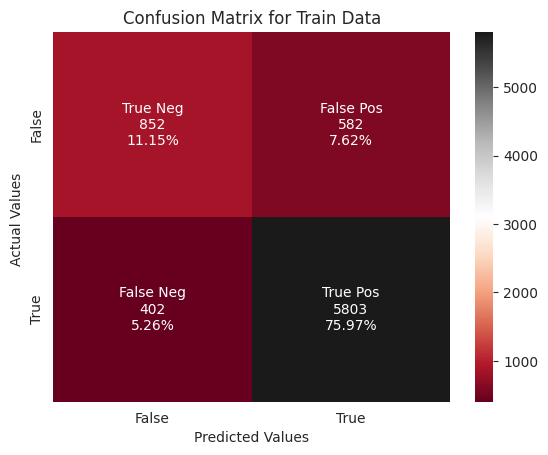

In [ ]:
y_pred = lr_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

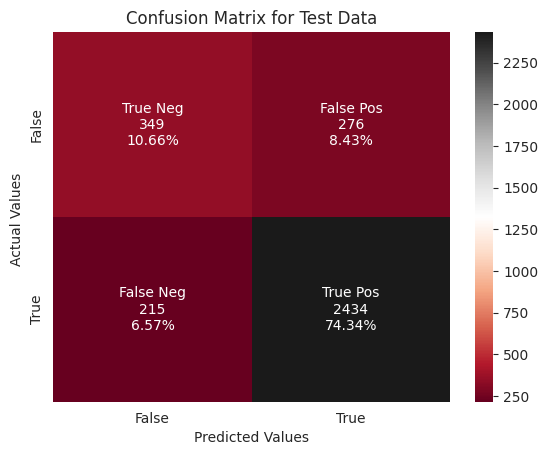

In [ ]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# Assuming you have already trained and fitted the Logistic Regression model as 'lr_clf'

# Create a new input tuple as a dictionary with the required features
new_input = {
    'BMI': 25.0,                    # Replace with the actual BMI value for the new input
    'Age': 40,                      # Replace with the actual Age for the new input
    'Systolic Blood Pressure': 140, # Replace with the actual Systolic Blood Pressure value
    'Diastolic Blood Pressure': 80  # Replace with the actual Diastolic Blood Pressure value
}

# Convert the input dictionary into a 2D array-like input
new_input_array = np.array([
    [new_input['BMI'], new_input['Age'], new_input['Systolic Blood Pressure'], new_input['Diastolic Blood Pressure']]
])

# Predict on the Logistic Regression model
prediction = lr_clf.predict(new_input_array)

if prediction[0] == 1:
    print("The model predicts the presence of the disease.")
else:
    print("The model predicts the absence of the disease.")


The model predicts the presence of the disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9333888516144693

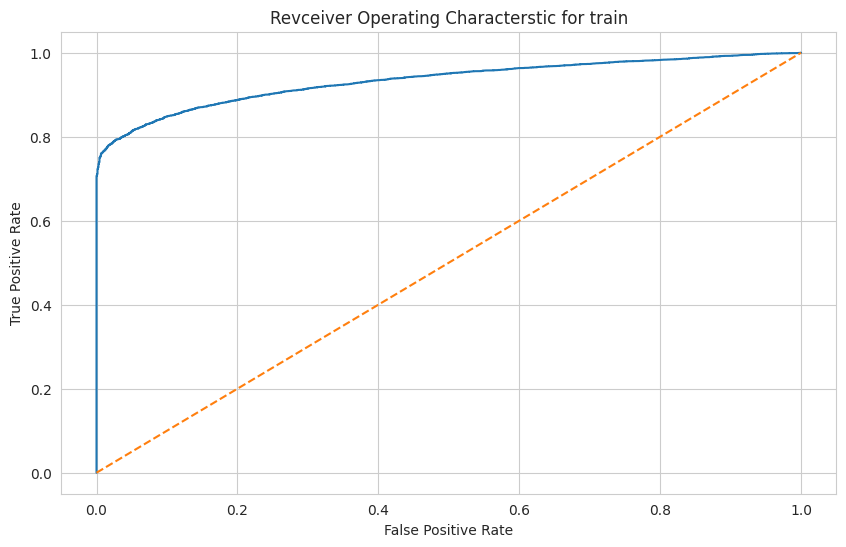

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9179732729331823

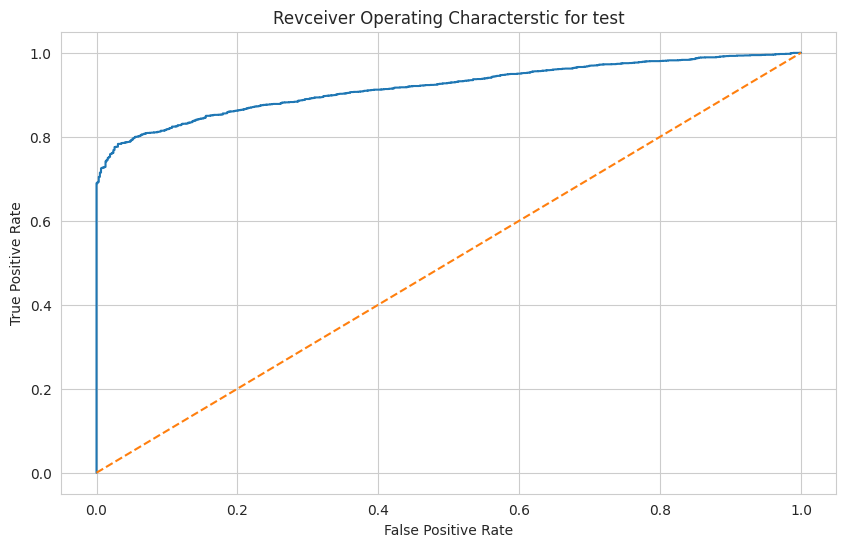

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Initialize an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Calculate accuracy scores
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

# Create a DataFrame for the current model's results
results_df_2 = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Append the results to the main DataFrame
results_df = results_df.append(results_df_2, ignore_index=True)

# Remove duplicate rows with the same model name
results_df = results_df.drop_duplicates(subset='Model')

# Now you have a DataFrame without duplicate "LogisticRegression" rows
print(results_df)


                Model  Training Accuracy %  Testing Accuracy %
0  LogisticRegression                87.12               85.00


<ipython-input-206-d5432415a7d1>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-207-5f5d95fbe4cb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,87.12,85.00
1,LogisticRegression,87.12,85.00


## 2. K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.33%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.69    0.95      0.89       0.82          0.90
recall       0.79    0.92      0.89       0.85          0.89
f1-score     0.74    0.93      0.89       0.83          0.90
support   1434.00 6205.00      0.89    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1133  301]
 [ 514 5691]]

Test Result:
Accuracy Score: 87.35%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.64    0.94      0.87       0.79          0.88
recall      0.76    0.90      0.87       0.83          0.87
f1-score    0.70    0.92      0.87       0.81          0.88
support   625.00 2649.00      0.87    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 476  149]
 [ 

# Confusion Matrix

Confusion Matrix for Training

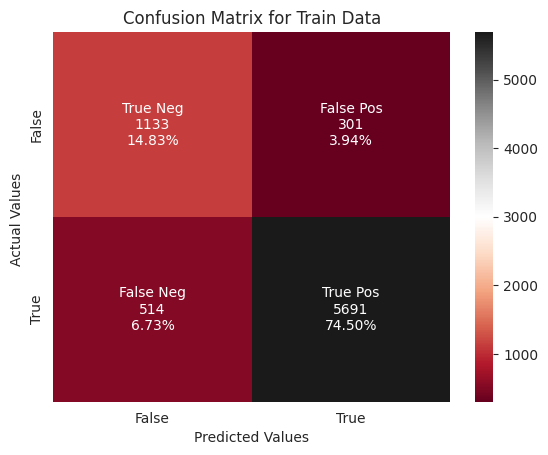

In [ ]:
y_pred = knn_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

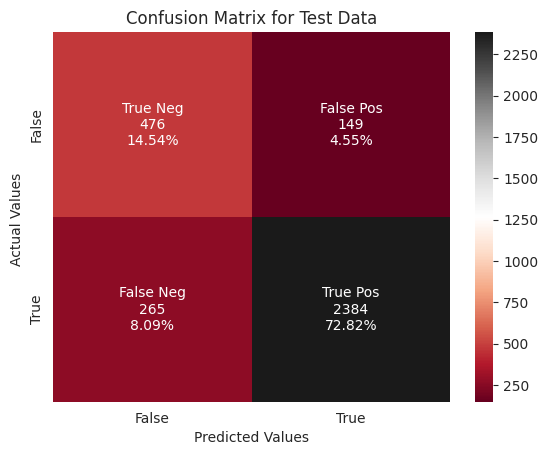

In [ ]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
import numpy as np

# Assuming you have already trained and fitted the KNN model as 'knn_clf'

# Create a new input tuple as a dictionary
new_input = {
    'BMI': 25.0,                    # Replace with the actual BMI value for the new input
    'Age': 40,                      # Replace with the actual Age for the new input
    'Systolic Blood Pressure': 180, # Replace with the actual Systolic Blood Pressure value
    'Diastolic Blood Pressure': 80  # Replace with the actual Diastolic Blood Pressure value
}

# Convert the input dictionary into a 2D array-like input
new_input_array = np.array([
    [new_input['BMI'], new_input['Age'], new_input['Systolic Blood Pressure'], new_input['Diastolic Blood Pressure']]
])

# Predict on the KNN model
prediction = knn_clf.predict(new_input_array)

print("Predicted class (0 or 1):", prediction)


Predicted class (0 or 1): [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9567972807280761

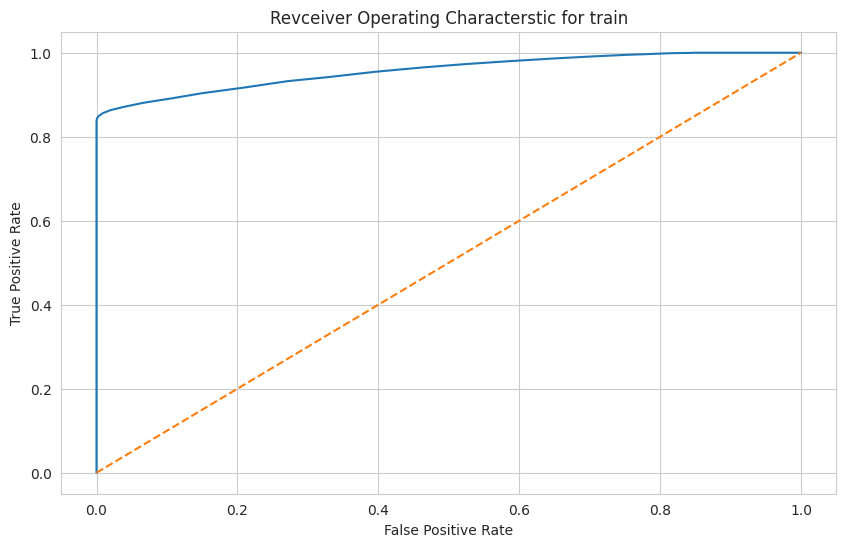

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9431701019252549

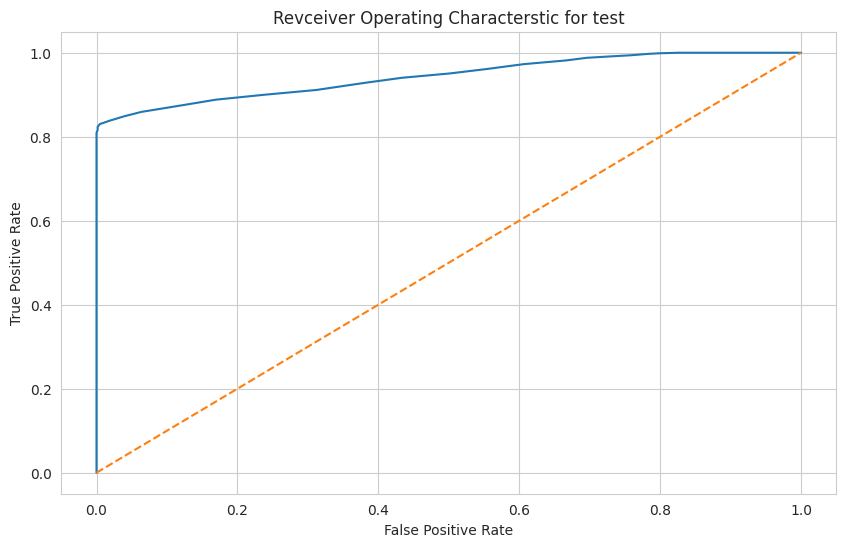

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

k-NN: Varying Number of Neighbors

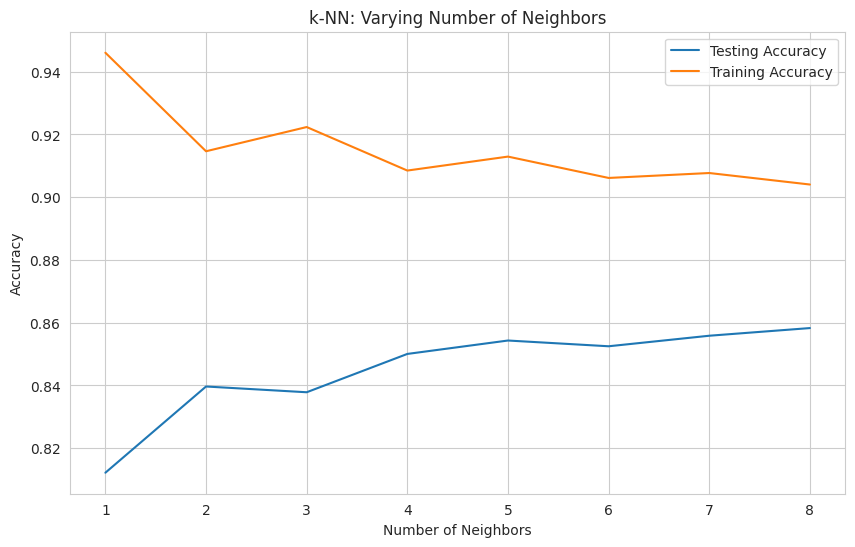

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-217-0b4a8483d86e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,87.12,85.00
1,LogisticRegression,87.12,85.00
2,K-nearest neighbors,90.40,85.83


## 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.65%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.69    0.96      0.90       0.82          0.91
recall       0.83    0.91      0.90       0.87          0.90
f1-score     0.75    0.93      0.90       0.84          0.90
support   1434.00 6205.00      0.90    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1184  250]
 [ 541 5664]]

Test Result:
Accuracy Score: 87.57%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.64    0.95      0.88       0.79          0.89
recall      0.80    0.89      0.88       0.85          0.88
f1-score    0.71    0.92      0.88       0.82          0.88
support   625.00 2649.00      0.88    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 500  125]
 [ 

# Confusion Matrix

Confusion Matrix for Training

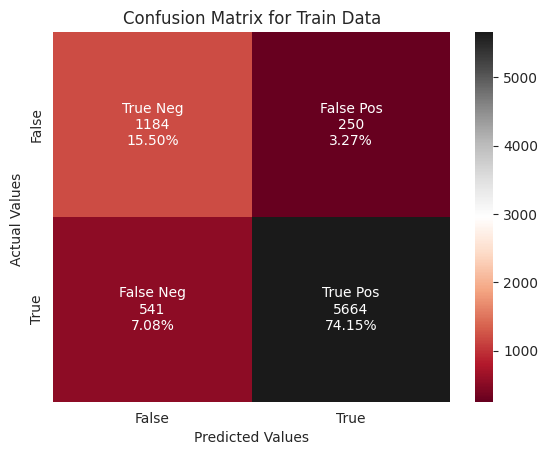

In [ ]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

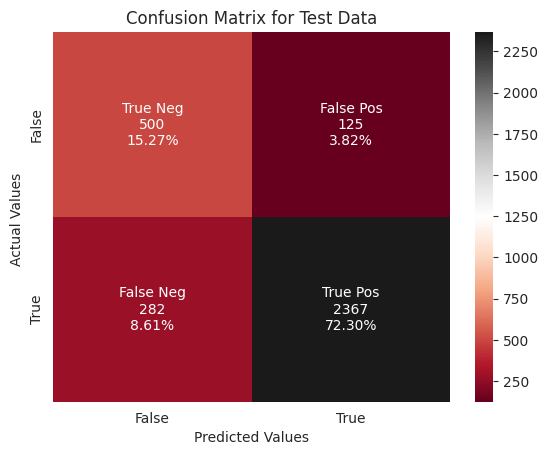

In [ ]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9582761011781339

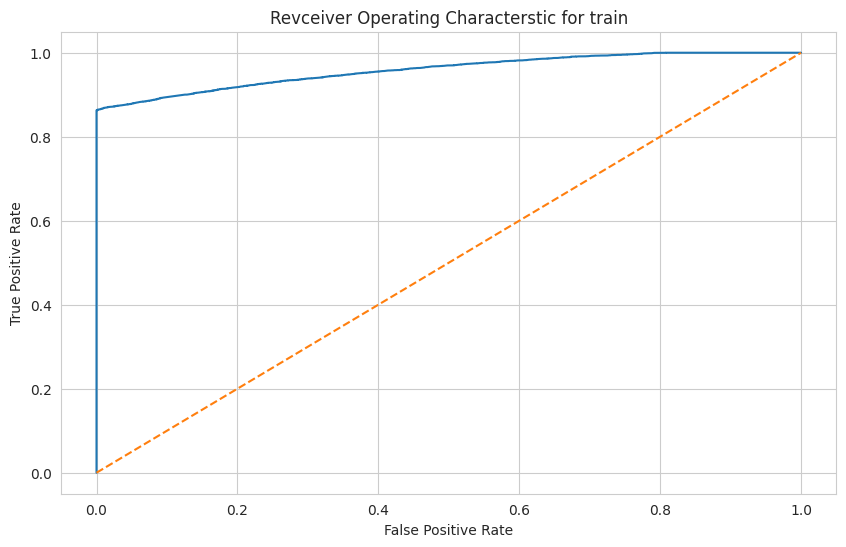

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9462293695734239

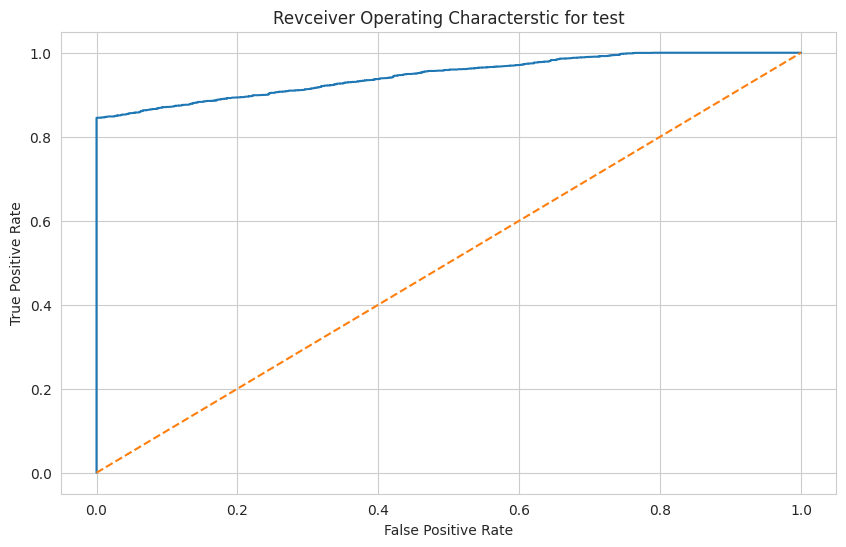

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-225-22c36c3e12d9>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,87.12,85.00
1,LogisticRegression,87.12,85.00
2,K-nearest neighbors,90.40,85.83
3,Random Forest Classifier,89.65,87.57


## 6. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.66%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.69    0.96      0.90       0.82          0.91
recall       0.82    0.91      0.90       0.87          0.90
f1-score     0.75    0.93      0.90       0.84          0.90
support   1434.00 6205.00      0.90    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1176  258]
 [ 532 5673]]

Test Result:
Accuracy Score: 87.72%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.64    0.95      0.88       0.80          0.89
recall      0.79    0.90      0.88       0.85          0.88
f1-score    0.71    0.92      0.88       0.82          0.88
support   625.00 2649.00      0.88    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 496  129]
 [ 

# Confusion Matrix

Confusion Matrix for Training

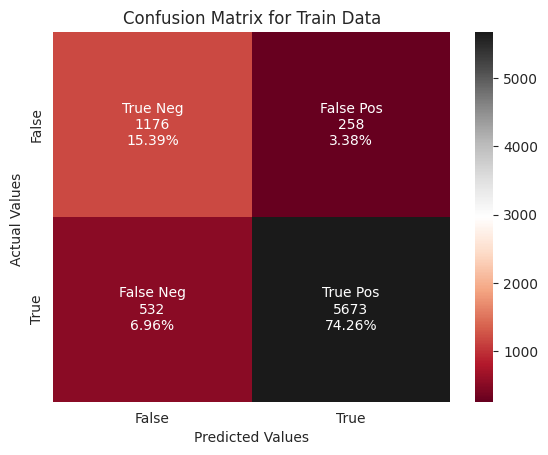

In [ ]:
y_pred = tree_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

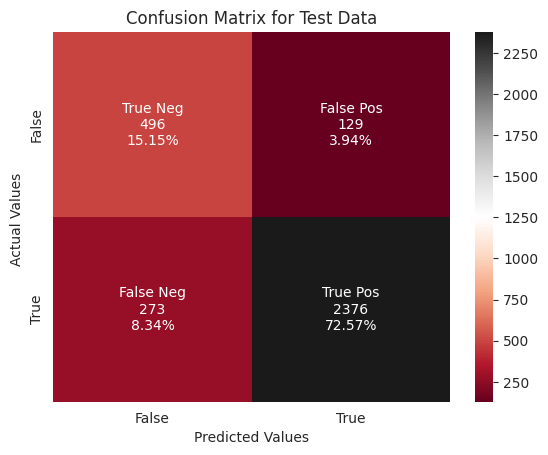

In [ ]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9583328556962993

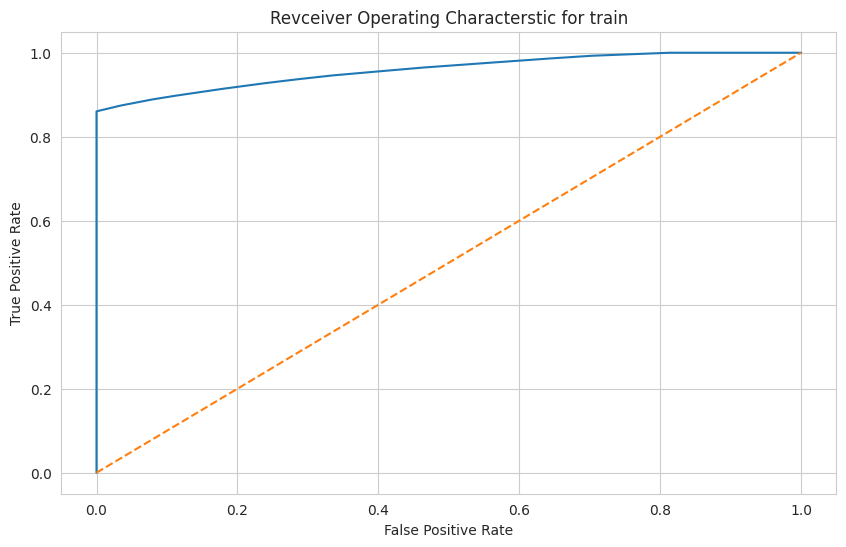

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9462130615326538

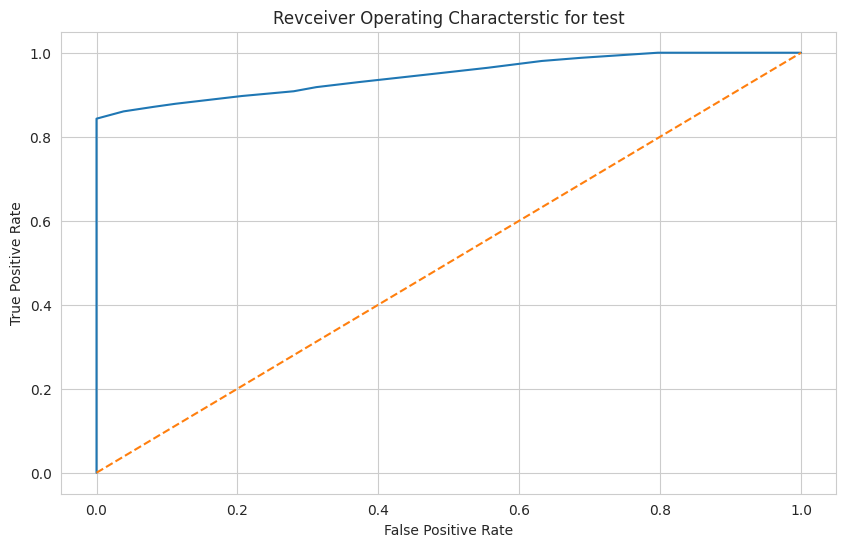

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-233-f3ad12d57771>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,87.12,85.00
1,LogisticRegression,87.12,85.00
2,K-nearest neighbors,90.40,85.83
3,Random Forest Classifier,89.65,87.57
4,Decision Tree,89.66,87.72


## 10. Support Vector machine

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.76%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.69    0.96      0.90       0.82          0.91
recall       0.82    0.92      0.90       0.87          0.90
f1-score     0.75    0.94      0.90       0.84          0.90
support   1434.00 6205.00      0.90    7639.00       7639.00
_______________________________________________
Confusion Matrix: 
 [[1175  259]
 [ 523 5682]]

Test Result:
Accuracy Score: 88.06%
_______________________________________________
CLASSIFICATION REPORT:
               0       1  accuracy  macro avg  weighted avg
precision   0.65    0.95      0.88       0.80          0.89
recall      0.79    0.90      0.88       0.85          0.88
f1-score    0.72    0.92      0.88       0.82          0.88
support   625.00 2649.00      0.88    3274.00       3274.00
_______________________________________________
Confusion Matrix: 
 [[ 495  130]
 [ 

# Confusion Matrix

Confusion Matrix for Training

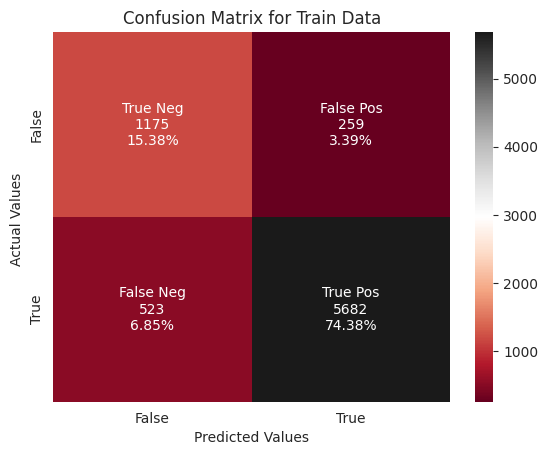

In [ ]:
y_pred = svm_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

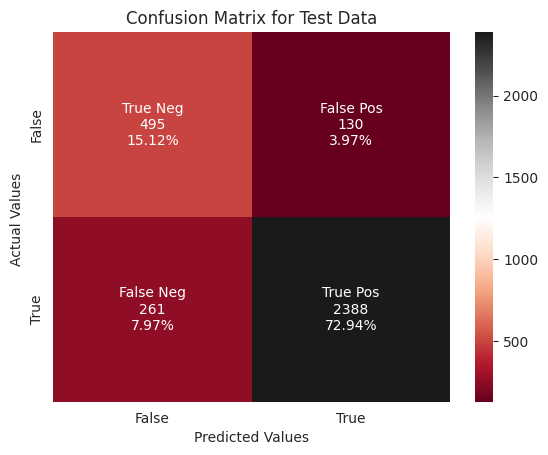

In [ ]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9555388476247952

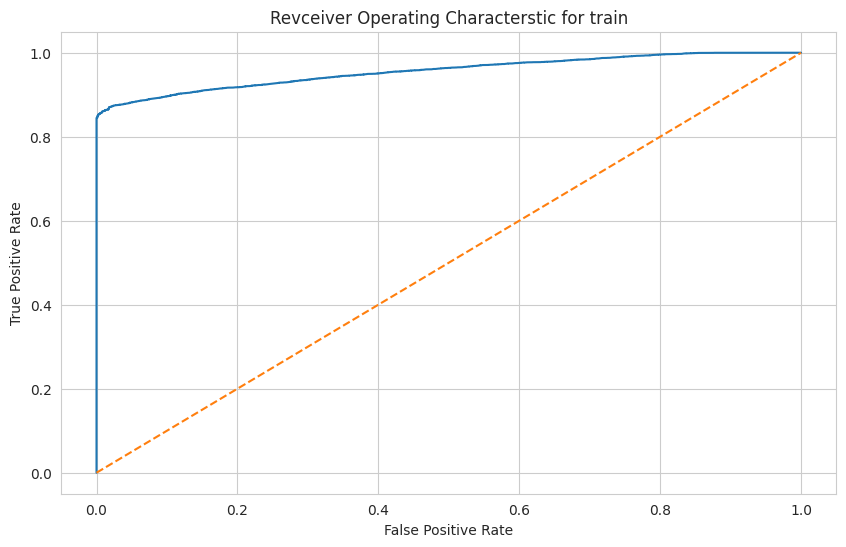

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for train')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9464634201585503

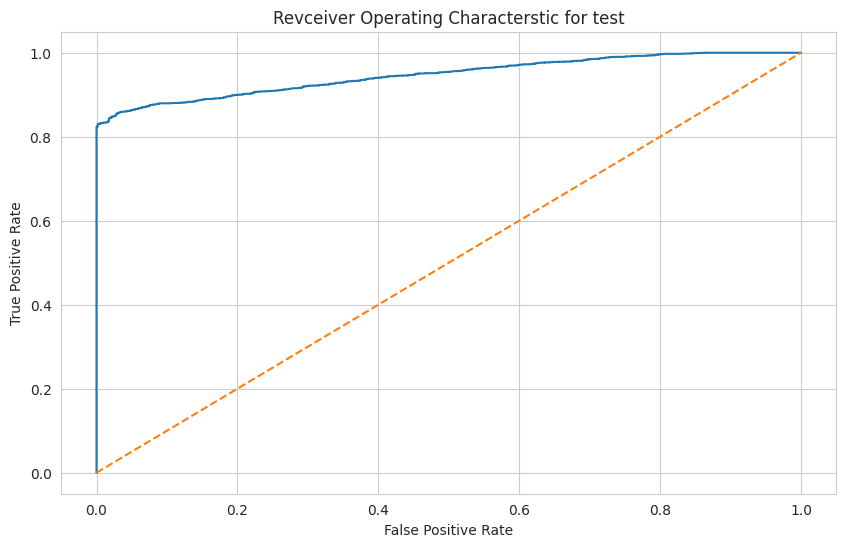

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic for test')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-241-e0cfd02efc26>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,87.12,85.00
1,LogisticRegression,87.12,85.00
2,K-nearest neighbors,90.40,85.83
3,Random Forest Classifier,89.65,87.57
4,Decision Tree,89.66,87.72
5,Support Vector Machine,89.76,88.06
